<a href="https://colab.research.google.com/github/zczlxd1/zczlxd1-Genshin-impact-Character-Recognition/blob/main/Genshin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

第一步首先导入fastbook的数据库

In [1]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 197 kB 43.3 MB/s 
     |████████████████████████████████| 1.2 MB 34.8 MB/s 
     |████████████████████████████████| 4.2 MB 41.9 MB/s 
     |████████████████████████████████| 342 kB 46.7 MB/s 
     |████████████████████████████████| 59 kB 4.4 MB/s 
     |████████████████████████████████| 140 kB 59.2 MB/s 
     |████████████████████████████████| 212 kB 49.6 MB/s 
     |████████████████████████████████| 1.1 MB 45.3 MB/s 
     |████████████████████████████████| 84 kB 3.7 MB/s 
     |████████████████████████████████| 127 kB 42.0 MB/s 
     |████████████████████████████████| 144 kB 60.9 MB/s 
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 271 kB 53.8 MB/s 
     |████████████████████████████████| 6.6 MB 32.5 MB/s 
     |████████████████████████████████| 596 kB 59.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the p

In [3]:
from fastbook import *
from fastai.vision.widgets import *

第二部通过key链接你的Azure账户

In [4]:
key = os.environ.get('AZURE_SEARCH_KEY','34fba19a2da04d5aafd9669ca87b0370')

In [22]:
search_images_bing
results = search_images_bing(key,'Genshin')
ims = results.attrgot('contentUrl')
len(ims)


150

In [20]:
dest = 'images/Genshin.jpg'
download_url(ims[0],dest)

Path('images/Genshin.jpg')

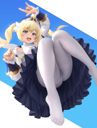

In [21]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
Genshin_types = 'Hutao','Zhongli','Xiao','Ganyu','Diluc','Mona'
path = Path('genshin')

In [ ]:
if not path.exists():
  path.mkdir()
  for o in Genshin_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} Genshin')
    download_images(dest,urls = results.attrgot('contentUrl'))

In [ ]:
fns = get_image_files(path)
fns

NotImplementedError: ignored

In [ ]:
failed = verify_images(fns)
failed

(#13) [Path('genshin/Zhongli/00000035.jpg'),Path('genshin/Zhongli/00000116.jpg'),Path('genshin/Zhongli/00000006.jpg'),Path('genshin/Zhongli/00000097.jpg'),Path('genshin/Zhongli/00000012.jpg'),Path('genshin/Zhongli/00000112.jpg'),Path('genshin/Xiao/00000115.jpg'),Path('genshin/Xiao/00000012.jpg'),Path('genshin/Ganyu/00000046.png'),Path('genshin/Diluc/00000030.jpg')...]

In [ ]:
failed.map(Path.unlink);

In [ ]:
Genshin = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = Genshin.dataloaders(path)

NotImplementedError: ignored

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


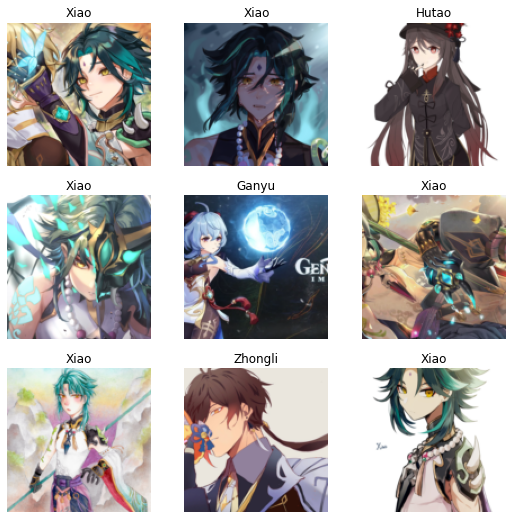

In [ ]:
dls.valid.show_batch(max_n=9, nrows=3)

In [ ]:
Genshin = Genshin.new(item_tfms=Resize(128,ResizeMethod.Squish))
dls = Genshin.dataloaders(path)
dls.valid.show_batch(max_n=12,nrows=3)

NotImplementedError: ignored

In [ ]:
Genshin = Genshin.new(item_tfms=Resize(128,ResizeMethod.Pad, pad_mode='zeros'))
dls = Genshin.dataloaders(path)
dls.valid.show_batch(max_n=9,nrows=3)

NotImplementedError: ignored

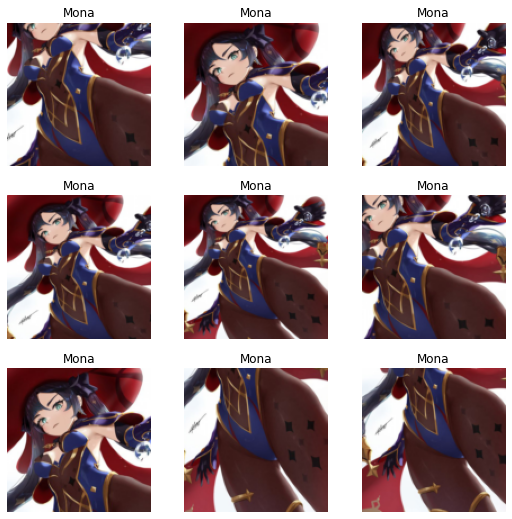

In [ ]:
Genshin = Genshin.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = Genshin.dataloaders(path)
dls.train.show_batch(max_n=9,nrows=3,unique=True)

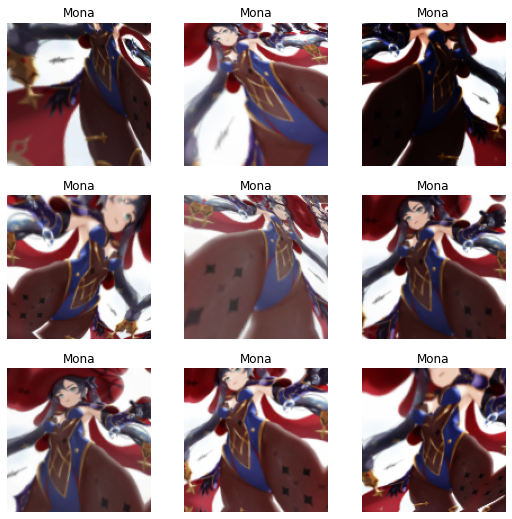

In [ ]:
Genshin = Genshin.new(item_tfms=Resize(128),batch_tfms=aug_transforms(mult=2))
dls = Genshin.dataloaders(path)
dls.train.show_batch(max_n=9, nrows=3, unique=True)

In [ ]:
learn = vision_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,2.484300,1.134281,0.358025,00:22


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,1.382857,0.425628,0.129630,00:22
1,1.103885,0.254081,0.092593,00:22
2,0.881159,0.186424,0.061728,00:24
3,0.765446,0.182039,0.043210,00:22


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


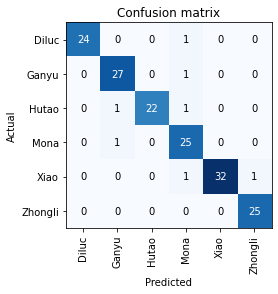

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

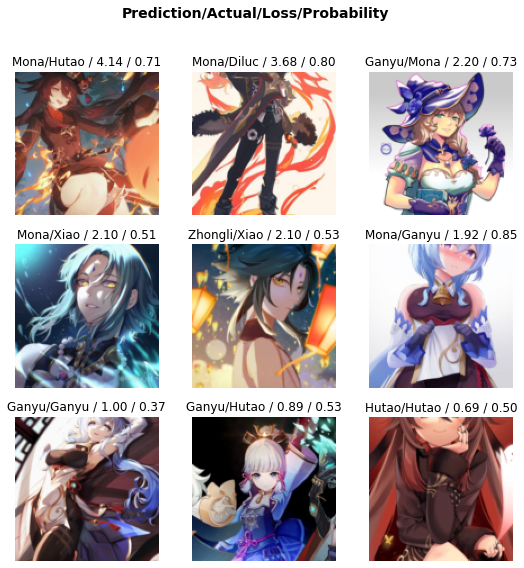

In [ ]:
interp.plot_top_losses(9,nrows=3)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='pkl')


(#0) []

In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('images/Genshin.jpg')

('Hutao',
 TensorBase(2),
 TensorBase([1.6435e-04, 4.5002e-02, 4.7019e-01, 4.6994e-01, 1.4524e-02, 1.7492e-04]))

In [ ]:
learn_inf.dls.vocab

['Diluc', 'Ganyu', 'Hutao', 'Mona', 'Xiao', 'Zhongli']

In [ ]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [ ]:
img = PILImage.create(btn_upload.data[-1])

IndexError: ignored

In [ ]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

NameError: ignored

In [ ]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction:{pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

NameError: ignored

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [ ]:
def on_click_classify(change):
  img = PILImage.create(btn_upload.data[-1])
  out_pl.clear_output()
  with out_pl:display(img.to_thumb(128,128))
  pred,pred_idx,probs = learn_inf.predict(img)
  lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [ ]:
#putting back btn_upload to a widget for next cell
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select you figure!'),
     btn_upload, btn_run,out_pl, lbl_pred])

In [ ]:
!pip install voila
!jupyter serverextension enable --sys-prefix voila 

     |████████████████████████████████| 1.7 MB 4.5 MB/s 
     |████████████████████████████████| 70 kB 7.8 MB/s 
     |████████████████████████████████| 130 kB 49.8 MB/s 
     |████████████████████████████████| 342 kB 41.4 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 112 kB 47.1 MB/s 
     |████████████████████████████████| 561 kB 36.2 MB/s 
     |████████████████████████████████| 428 kB 50.1 MB/s 
     |████████████████████████████████| 54 kB 2.3 MB/s 
     |████████████████████████████████| 80 kB 7.0 MB/s 
     |████████████████████████████████| 133 kB 40.9 MB/s 
  Created wheel for json5: filename=json5-0.9.8-py2.py3-none-any.whl size=18604 sha256=10b333df4356d181b5fb37407ae89a025ba0fe6760581ec328dde5357764f5b8
  Stored in directory: /root/.cache/pip/wheels/ac/9b/de/6e4fd8f159d3dfa42c42ceddf2184fda29ea7fb1e8f5f8371c
Successfully built json5
  Attempting uninstall: tornado
    Found existing installation: tornado 5.1.1
    Unin

Enabling: voila
- Writing config: /usr/etc/jupyter
    - Validating...
      voila  OK
